In [1]:
!python -m ensurepip
%pip install pandas
%pip install statsmodels
%pip install matplotlib
%pip install seaborn
%pip install scipy


zsh:1: command not found: python
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLi

In [2]:
import json
import os
import pandas as pd

data = pd.DataFrame(columns=['participant', 'condition', 'rt', 'accuracy'])

data_path = 'data'

participants = os.listdir(data_path)
index = 0
for participant in participants:
    for json_file_name in os.listdir(os.path.join(data_path, participant)):
        json_file_path = os.path.join(data_path, participant, json_file_name)
        with open(json_file_path) as json_file:
            json_data = json.load(json_file)
            if json_data['training'] == True:
                continue
            rt = json_data['endTime'] - json_data['startTime']
            data.loc[index] = [
                participant,
                json_data['runType'],
                rt,
                1 if json_data['correct'] else 0,
            ]
            index = index + 1

data

,participant,condition,rt,accuracy
0,part002,NO_SOUND,1.279449,1
1,part002,PHASE_SHIFT_SOUND,0.821625,1
2,part002,PHASE_SHIFT_SOUND,1.601303,1
3,part002,UNSYNC_SOUND,0.708313,1
4,part002,UNSYNC_SOUND,2.185699,1
...,...,...,...,...
715,part007,UNSYNC_SOUND,0.918640,1
716,part007,NO_SOUND,0.820282,1
717,part007,PHASE_SHIFT_SOUND,2.033051,1
718,part007,NO_SOUND,1.614883,1


In [3]:
data.groupby(['participant', 'condition'])['rt'].mean()

participant  condition        
part001      NO_SOUND             1.687112
             PHASE_SHIFT_SOUND    1.490872
             SYNC_SOUND           1.404321
             UNSYNC_SOUND         1.696650
part002      NO_SOUND             1.413760
             PHASE_SHIFT_SOUND    1.119929
             SYNC_SOUND           1.667099
             UNSYNC_SOUND         1.248835
part003      NO_SOUND             1.502304
             PHASE_SHIFT_SOUND    1.503962
             SYNC_SOUND           1.224021
             UNSYNC_SOUND         1.356483
part004      NO_SOUND             1.285259
             PHASE_SHIFT_SOUND    1.428340
             SYNC_SOUND           1.550959
             UNSYNC_SOUND         1.274304
part005      NO_SOUND             1.457384
             PHASE_SHIFT_SOUND    1.350187
             SYNC_SOUND           1.460502
             UNSYNC_SOUND         1.440639
part006      NO_SOUND             1.465879
             PHASE_SHIFT_SOUND    1.236116
             SYNC_SOUND

In [4]:
data.groupby(['participant', 'condition'])['accuracy'].mean()

participant  condition        
part001      NO_SOUND             1.00
             PHASE_SHIFT_SOUND    1.00
             SYNC_SOUND           1.00
             UNSYNC_SOUND         1.00
part002      NO_SOUND             1.00
             PHASE_SHIFT_SOUND    1.00
             SYNC_SOUND           1.00
             UNSYNC_SOUND         0.95
part003      NO_SOUND             0.90
             PHASE_SHIFT_SOUND    0.95
             SYNC_SOUND           0.90
             UNSYNC_SOUND         0.90
part004      NO_SOUND             1.00
             PHASE_SHIFT_SOUND    0.95
             SYNC_SOUND           1.00
             UNSYNC_SOUND         1.00
part005      NO_SOUND             0.95
             PHASE_SHIFT_SOUND    0.85
             SYNC_SOUND           0.90
             UNSYNC_SOUND         0.95
part006      NO_SOUND             1.00
             PHASE_SHIFT_SOUND    0.95
             SYNC_SOUND           1.00
             UNSYNC_SOUND         1.00
part007      NO_SOUND            

In [5]:
data.groupby(['condition'])['accuracy'].mean()

condition
NO_SOUND             0.961111
PHASE_SHIFT_SOUND    0.944444
SYNC_SOUND           0.977778
UNSYNC_SOUND         0.972222
Name: accuracy, dtype: float64

In [6]:
data.groupby(['condition'])['rt'].mean()

condition
NO_SOUND             1.478959
PHASE_SHIFT_SOUND    1.432585
SYNC_SOUND           1.469289
UNSYNC_SOUND         1.415233
Name: rt, dtype: float64

In [7]:
data.groupby(['condition'])['rt'].std()

condition
NO_SOUND             0.539199
PHASE_SHIFT_SOUND    0.581487
SYNC_SOUND           0.622312
UNSYNC_SOUND         0.527714
Name: rt, dtype: float64

Text(0.5, 0, 'mean RT [sec]')

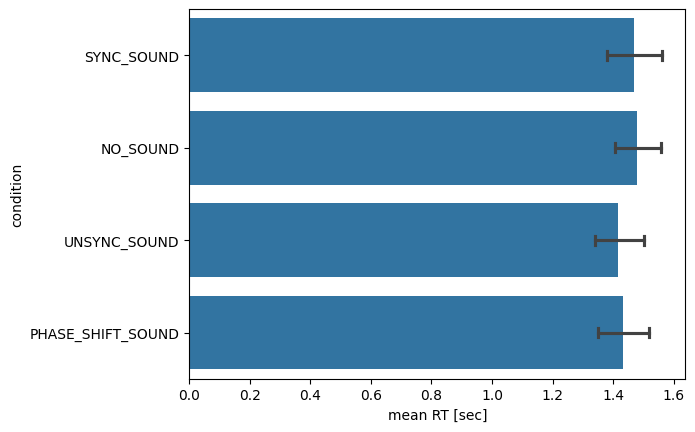

In [8]:
import seaborn as sb

ax = sb.barplot(data, y='condition', x='rt', orient='h', capsize=0.1, order=['SYNC_SOUND', 'NO_SOUND', 'UNSYNC_SOUND', 'PHASE_SHIFT_SOUND'])
ax.set_xlabel('mean RT [sec]')


Text(0.5, 0, 'mean accuracy')

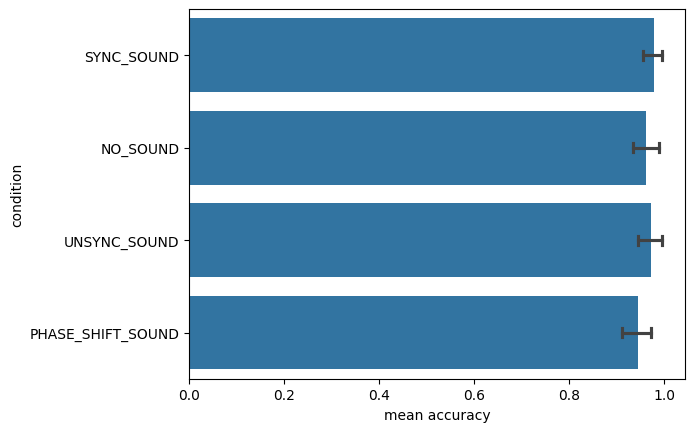

In [9]:
ax = sb.barplot(data, y='condition', x='accuracy', orient='h', capsize=0.1, order=['SYNC_SOUND', 'NO_SOUND', 'UNSYNC_SOUND', 'PHASE_SHIFT_SOUND'])
ax.set_xlabel('mean accuracy')

In [10]:
import statsmodels as sm

res = sm.stats.anova.AnovaRM(data, depvar='rt', subject='participant', within=['condition'], aggregate_func='mean')
res.fit().summary()

AttributeError: module 'statsmodels' has no attribute 'stats'

Text(0.5, 0, 'RT [sec]')

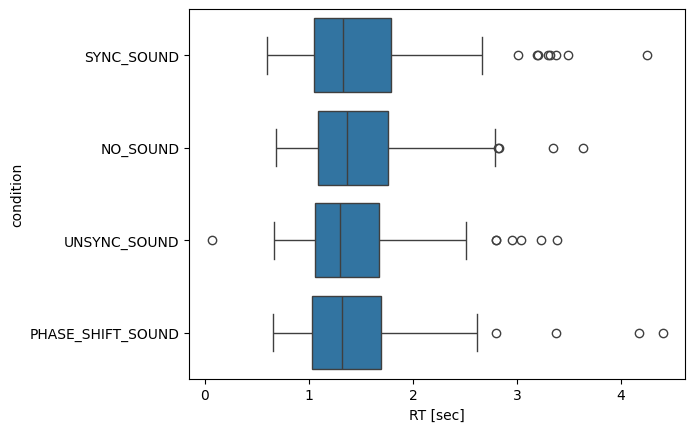

In [ ]:

ax = sb.boxplot(data, y='condition', x='rt', orient='h', order=['SYNC_SOUND', 'NO_SOUND', 'UNSYNC_SOUND', 'PHASE_SHIFT_SOUND'])
ax.set_xlabel('RT [sec]')


Text(0.5, 0, 'accuracy')

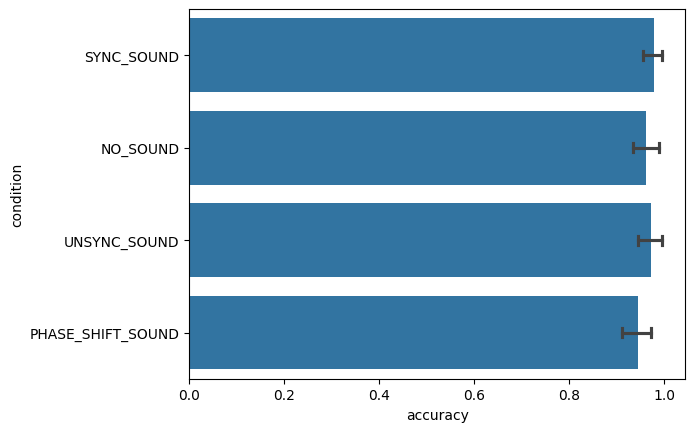

In [ ]:
ax = sb.barplot(data, y='condition', x='accuracy', orient='h', capsize=0.1, order=['SYNC_SOUND', 'NO_SOUND', 'UNSYNC_SOUND', 'PHASE_SHIFT_SOUND'])
ax.set_xlabel('accuracy')

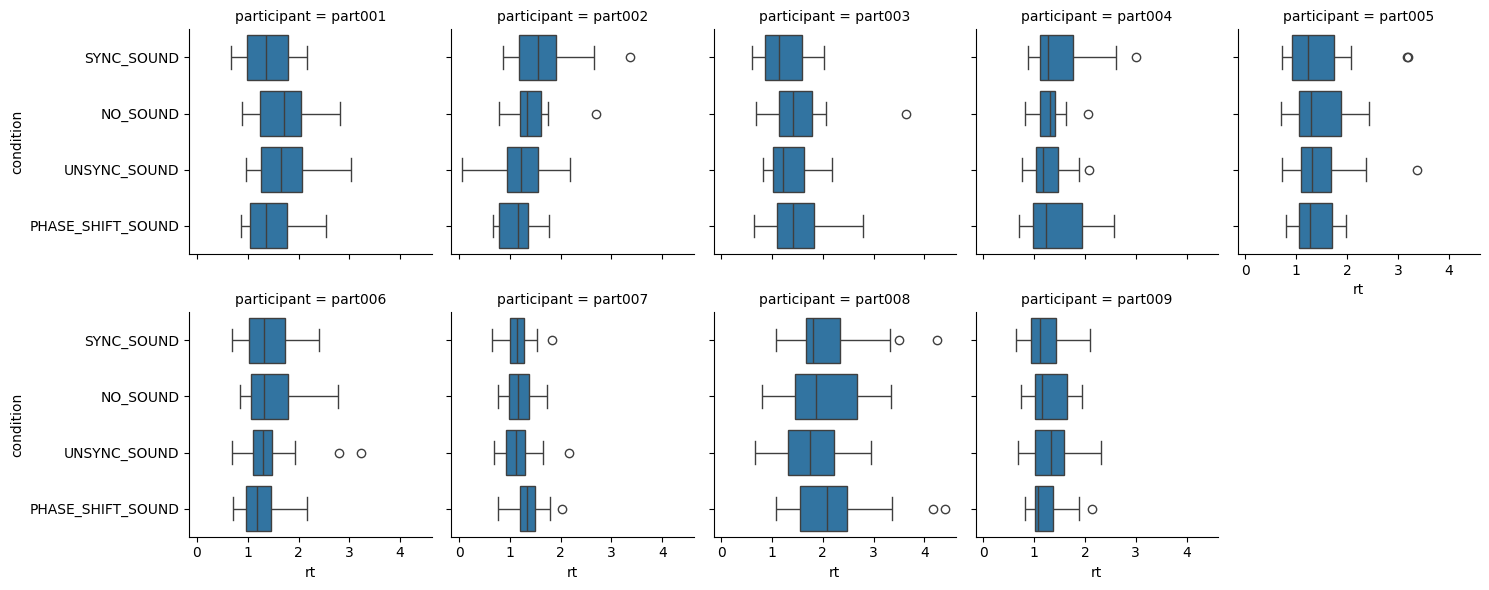

In [ ]:
g = sb.FacetGrid(data, col="participant", col_wrap=5, col_order=sorted(participants))
g.map(sb.boxplot, "rt", "condition", order=['SYNC_SOUND', 'NO_SOUND', 'UNSYNC_SOUND', 'PHASE_SHIFT_SOUND'])

In [ ]:
data_filtered = data.loc[data['rt'] <= 2.5]
data_filtered = data_filtered.loc[data_filtered['rt'] > 0.5]
data_filtered

,participant,condition,rt,accuracy
0,part002,NO_SOUND,1.279449,1
1,part002,PHASE_SHIFT_SOUND,0.821625,1
2,part002,PHASE_SHIFT_SOUND,1.601303,1
3,part002,UNSYNC_SOUND,0.708313,1
4,part002,UNSYNC_SOUND,2.185699,1
...,...,...,...,...
715,part007,UNSYNC_SOUND,0.918640,1
716,part007,NO_SOUND,0.820282,1
717,part007,PHASE_SHIFT_SOUND,2.033051,1
718,part007,NO_SOUND,1.614883,1


Text(0.5, 0, 'mean RT [sec]')

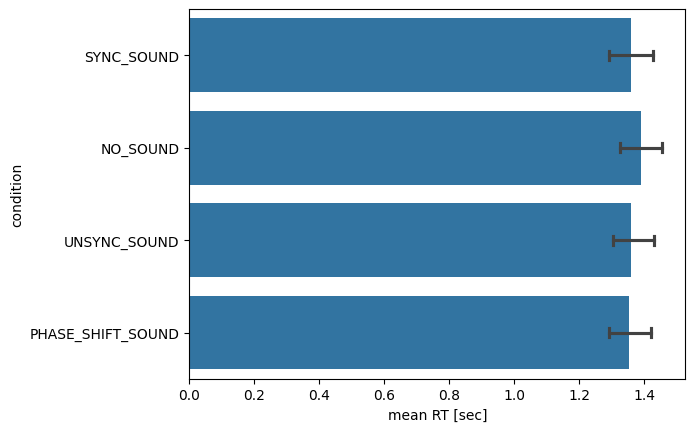

In [ ]:
import seaborn as sb

ax = sb.barplot(data_filtered, y='condition', x='rt', orient='h', capsize=0.1, order=['SYNC_SOUND', 'NO_SOUND', 'UNSYNC_SOUND', 'PHASE_SHIFT_SOUND'])
ax.set_xlabel('mean RT [sec]')


Text(0.5, 0, 'RT [sec]')

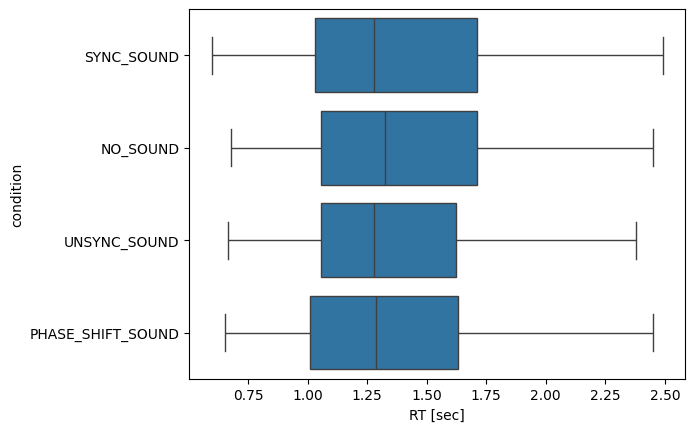

In [ ]:
ax = sb.boxplot(data_filtered, y='condition', x='rt', orient='h', order=['SYNC_SOUND', 'NO_SOUND', 'UNSYNC_SOUND', 'PHASE_SHIFT_SOUND'])
ax.set_xlabel('RT [sec]')

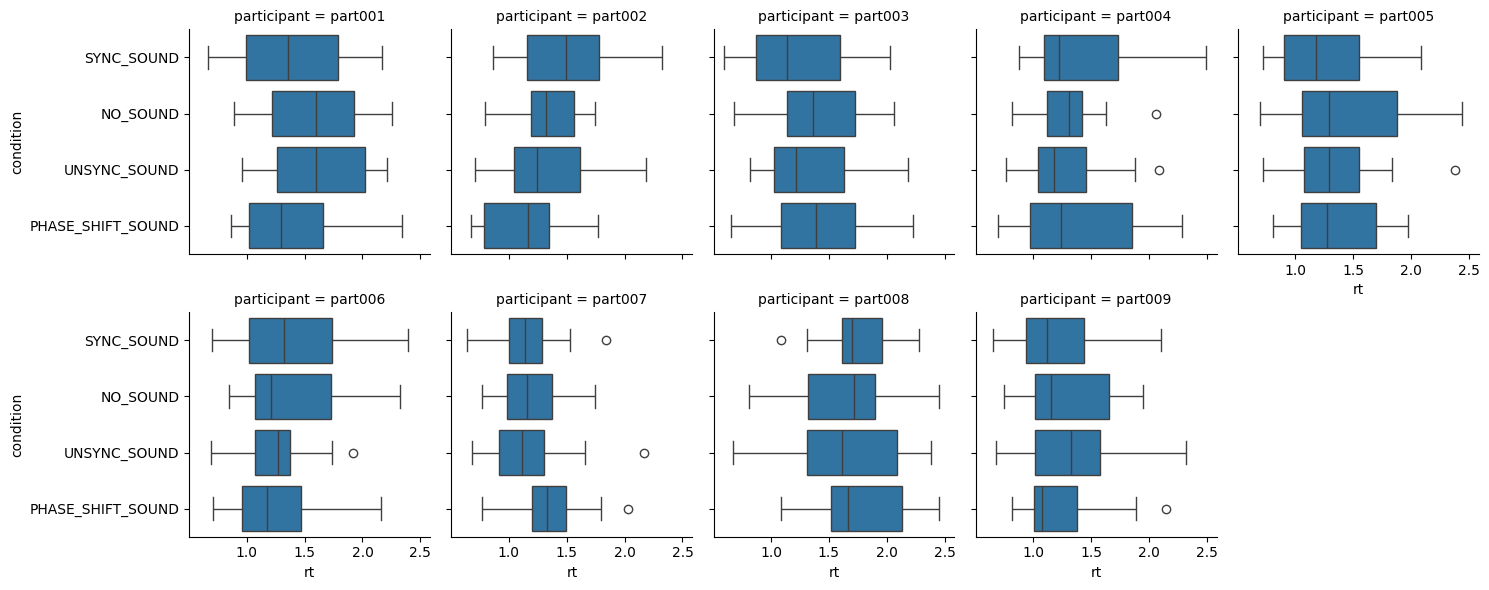

In [ ]:
g = sb.FacetGrid(data_filtered, col="participant", col_wrap=5, col_order=sorted(participants))
g.map(sb.boxplot, "rt", "condition", order=['SYNC_SOUND', 'NO_SOUND', 'UNSYNC_SOUND', 'PHASE_SHIFT_SOUND'])

In [ ]:
data.groupby(['participant', 'condition'])['accuracy'].mean()

participant  condition        
part001      NO_SOUND             1.00
             PHASE_SHIFT_SOUND    1.00
             SYNC_SOUND           1.00
             UNSYNC_SOUND         1.00
part002      NO_SOUND             1.00
             PHASE_SHIFT_SOUND    1.00
             SYNC_SOUND           1.00
             UNSYNC_SOUND         0.95
part003      NO_SOUND             0.90
             PHASE_SHIFT_SOUND    0.95
             SYNC_SOUND           0.90
             UNSYNC_SOUND         0.90
part004      NO_SOUND             1.00
             PHASE_SHIFT_SOUND    0.95
             SYNC_SOUND           1.00
             UNSYNC_SOUND         1.00
part005      NO_SOUND             0.95
             PHASE_SHIFT_SOUND    0.85
             SYNC_SOUND           0.90
             UNSYNC_SOUND         0.95
part006      NO_SOUND             1.00
             PHASE_SHIFT_SOUND    0.95
             SYNC_SOUND           1.00
             UNSYNC_SOUND         1.00
part007      NO_SOUND            

In [ ]:
import scipy as sp

sp.stats.kruskal(*[y for x, y in data_filtered.groupby('condition')['rt']])

KruskalResult(statistic=0.9282177880427677, pvalue=0.8186134159044361)

In [ ]:
res = sm.stats.anova.AnovaRM(data_filtered, depvar='rt', subject='participant', within=['condition'], aggregate_func='mean')
res.fit().summary()

,F Value,Num DF,Den DF,Pr > F
condition,0.2224,3.0000,24.0000,0.8798
